<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

[![PyPI version](https://badge.fury.io/py/pybx.svg)](https://badge.fury.io/py/pybx)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thatgeeman/pybx/blob/master/examples/pybx_walkthrough_0.4.ipynb)

A simple python package to generate anchor boxes for multi-box 
object detection models. 

Calculated anchor boxes are in `pascal_voc` format by default.

### Installation
```shell
pip install pybx
```

### Usage

To calculate the anchor boxes for a single feature size and 
aspect ratio, given the image size: 

In [ ]:
from pybx import anchor, ops

image_sz = (256, 256)
feature_sz = (10, 10)
asp_ratio = 1/2.

coords, labels = anchor.bx(image_sz, feature_sz, asp_ratio)

100 anchor boxes of `asp_ratio` 0.5 is generated along with [unique labels](../data/README.md):

In [ ]:
len(coords), len(labels)

(100, 100)

The anchor box labels are especially useful, since they are pretty descriptive:

In [ ]:
coords[-1], labels[-1]

([234, 225, 252, 256], 'a_10x10_0.5_99')

To calculate anchor boxes for **multiple** feature sizes and 
aspect ratios, we use `anchor.bxs` instead:

In [ ]:
feature_szs = [(10, 10), (8, 8)]
asp_ratios = [1., 1/2., 2.]

coords, labels = anchor.bxs(image_sz, feature_szs, asp_ratios)

All anchor boxes are returned as `ndarrays` of shape `(N,4)` where N
is the number of boxes. 

The box labels are even more important now, since they help you uniquely identify 
to which feature map size or aspect ratios they belong to.

In [ ]:
coords[101], labels[101]

(array([29,  0, 47, 30]), 'a_10x10_0.5_1')

In [ ]:
coords[-1], labels[-1]

(array([217, 228, 256, 251]), 'a_8x8_2.0_63')

#### [`MultiBx`](https://thatgeeman.github.io/pybx/basics.html#multibx) methods
Box coordinates (with/without labels) in any format 
(usually `ndarray`, `list`, `json`, `dict`) 
can be instantialized as a [`MultiBx`](https://thatgeeman.github.io/pybx/basics.html#multibx), exposing many useful 
methods and attributes of [`MultiBx`](https://thatgeeman.github.io/pybx/basics.html#multibx). 
For example to calculate the area of each box iteratively:

In [ ]:
from pybx.basics import * 
# passing anchor boxes and labels from anchor.bxs()
print(coords.shape)

boxes = mbx(coords, labels)
type(boxes)

(492, 4)


pybx.basics.MultiBx

In [ ]:
len(boxes)

492

In [ ]:
areas = [b.area for b in boxes]

Each annotation in the [`MultiBx`](https://thatgeeman.github.io/pybx/basics.html#multibx) object `boxes` is also a [`BaseBx`](https://thatgeeman.github.io/pybx/basics.html#basebx) 
with its own set of methods and properties. 

In [ ]:
boxes[-1]

BaseBx(coords=[[217, 228, 256, 251]], label=['a_8x8_2.0_63'])

In [ ]:
boxes[-1].coords, boxes[-1].label

([[217, 228, 256, 251]], (#1) ['a_8x8_2.0_63'])

[`MultiBx`](https://thatgeeman.github.io/pybx/basics.html#multibx) objects can also be "added" which stacks 
them vertically to create a new [`MultiBx`](https://thatgeeman.github.io/pybx/basics.html#multibx) object:

In [ ]:
boxes_true = mbx(coords_json)    # annotation as json records
len(boxes_true)

2

In [ ]:
boxes_anchor = mbx(coords_numpy) # annotation as ndarray
len(boxes_anchor)

492

In [ ]:
boxes_true

MultiBx(coords=[[130, 63, 225, 180], [13, 158, 90, 213]], label=['clock', 'frame'])

In [ ]:
boxes = boxes_true + boxes_anchor + boxes_true

In [ ]:
len(boxes)

496

In [ ]:
from pybx.anchor import get_gt_thresh_iou, get_gt_max_iou
from pybx.vis import VisBx

In [ ]:
image_sz

(256, 256)

In [ ]:
boxes_true

MultiBx(coords=[[130, 63, 225, 180], [13, 158, 90, 213]], label=['clock', 'frame'])

Calculate candidate anchor boxes for many aspect ratios and scales.

In [ ]:
feature_szs = [(10, 10), (3, 3), (2, 2)]
asp_ratios = [0.3, 1/2., 2.]

anchors, labels = anchor.bxs(image_sz, feature_szs, asp_ratios)

Wrap using pybx methods. This step is not necessary but convenient.

In [ ]:
boxes_anchor = get_bx(anchors, labels) 
len(boxes_anchor)

341

The following function returns two positive ground truth anchors with largest IOU for each class in the label bounding boxes passed.

In [ ]:
gt_anchors, gt_ious, gt_masks = get_gt_max_iou( 
    true_annots=boxes_true, 
    anchor_boxes=boxes_anchor,  # if plain numpy, pass anchor_boxes and anchor_labels 
    update_labels=False,  # whether to replace ground truth labels with true labels
    positive_boxes=1,  # can request extra boxes 
)

In [ ]:
gt_anchors

{'clock': BaseBx(coords=[[156, 0, 227, 180]], label=['a_2x2_0.3_1']),
 'frame': BaseBx(coords=[[12, 152, 72, 256]], label=['a_3x3_0.5_6'])}

In [ ]:
all_gt_anchors = gt_anchors['clock'] + gt_anchors['frame']
all_gt_anchors

/mnt/data/projects/pybx/pybx/basics.py:464: BxViolation: Change of object type imminent if trying to add <class 'pybx.basics.BaseBx'>+<class 'pybx.basics.BaseBx'>. Use <class 'pybx.basics.BaseBx'>+<class 'pybx.basics.BaseBx'> instead or basics.stack_bxs().
  f"Change of object type imminent if trying to add "


MultiBx(coords=[[156, 0, 227, 180], [12, 152, 72, 256]], label=['a_2x2_0.3_1', 'a_3x3_0.5_6'])

<AxesSubplot:>

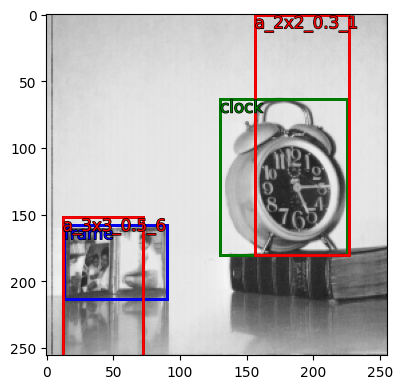

In [ ]:
v = VisBx(pth='../data/', img_fn='image.jpg', image_sz=image_sz)
v.show(all_gt_anchors, color={'a_2x2_0.3_1':'red', 'a_3x3_0.5_6': 'red'})

More exploratory stuff in the [walkthrough notebook](../examples/pybx_walkthrough_0.4.ipynb)!